# Data Scientist Professional Practical Exam Submission


# PROJECT REPORT

From: Sharukhali Farookali Naziyabegum Syed

Date: 20-9-2023

Subject: Project Summary - Recipe Site Traffic Analysis

# Executive Summary

I am pleased to present this report summarizing my work on the Recipe Site Traffic Analysis project. My objective was to develop insights into what makes certain recipes attract higher website traffic. I accomplished this by performing data validation, cleaning, extensive visualization, and model development.



# DATA VALIDATION AND CLEANING

In the initial phase of the project, I focused on ensuring the quality and integrity of my dataset. Here are the key steps I undertook:

Listing Rows and Columns: First i imported the dataset into the data frame then I began by listing all the rows and columns in my dataset. This allowed me to get a quick overview of its dimensions.

DataFrame Info: Using the info() function, I gained insights into the dataset's structure, data types, and the presence of any missing values.

In [36]:
import pandas as pd
# Read the CSV file into a DataFrame
df = pd.read_csv('recipe_site_traffic_2212.csv')

# Get the number of rows and columns (shape)
num_rows, num_columns = df.shape

# Get a basic description of the dataset
description = df.describe()

# Print the number of rows and columns (shape)
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

print(description)

Number of rows: 947
Number of columns: 8
           recipe     calories  carbohydrate       sugar     protein
count  947.000000   895.000000    895.000000  895.000000  895.000000
mean   474.000000   435.939196     35.069676    9.046547   24.149296
std    273.519652   453.020997     43.949032   14.679176   36.369739
min      1.000000     0.140000      0.030000    0.010000    0.000000
25%    237.500000   110.430000      8.375000    1.690000    3.195000
50%    474.000000   288.550000     21.480000    4.550000   10.800000
75%    710.500000   597.650000     44.965000    9.800000   30.200000
max    947.000000  3633.160000    530.420000  148.750000  363.360000


In [37]:
column_data_types = df.dtypes

# Print the data type of each column
print(column_data_types)

#from output it can be seen as datatypes of some columns are not suitable for model developement
      

recipe            int64
calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category         object
servings         object
high_traffic     object
dtype: object


to assign numbers to the categories for model developement, understanding the unique values present in the categories column

In [38]:
unique_categories = df['category'].unique()

# Print the unique categories
for category in unique_categories:
    print(category)
    
#this is done so that in further step new column can be made with numbers assigned to each category for model development

Pork
Potato
Breakfast
Beverages
One Dish Meal
Chicken Breast
Lunch/Snacks
Chicken
Vegetable
Meat
Dessert


In [39]:
#here the category no column is created with mapping for each category name 

category_mapping = {
    'Pork': 1,
    'Potato': 2,
    'Breakfast': 3,
    'Beverages': 4,
    'One Dish Meal': 5,
    'Chicken Breast': 6,
    'Lunch/Snacks': 7,
    'Chicken': 8,
    'Vegetable': 9,
    'Meat': 10,
    'Dessert': 11
}

# Map the categories to their respective numbers
df['category_no'] = df['category'].map(category_mapping)


# Print the DataFrame with the added category numbers
print(df)

     recipe  calories  carbohydrate  ...  servings  high_traffic category_no
0         1       NaN           NaN  ...         6          High           1
1         2     35.48         38.56  ...         4          High           2
2         3    914.28         42.68  ...         1           NaN           3
3         4     97.03         30.56  ...         4          High           4
4         5     27.05          1.85  ...         4           NaN           4
..      ...       ...           ...  ...       ...           ...         ...
942     943   1161.00          5.31  ...         2           NaN           7
943     944       NaN           NaN  ...         2          High           2
944     945    951.74         29.42  ...         2          High           1
945     946    266.61         35.77  ...         6          High           2
946     947    184.56         45.21  ...         4           NaN           4

[947 rows x 9 columns]


In [40]:
#high traffic column has very null values so replacing null with 0 and high with 1 

df['high_traffic'] = df['high_traffic'].replace({'High': 1, 'NaN': 0})


# Get the data types of each column
column_data_types = df.dtypes

# Print the data type of each column
print(column_data_types)

recipe            int64
calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category         object
servings         object
high_traffic    float64
category_no       int64
dtype: object


In [41]:
df['high_traffic'] = df['high_traffic'].replace({'High': 1, 'NaN': 0})


# Get the data types of each column
column_data_types = df.dtypes

# Print the data type of each column
print(column_data_types)

recipe            int64
calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category         object
servings         object
high_traffic    float64
category_no       int64
dtype: object


Null Values: I identified the number of null values in each column to assess the data's completeness and to decide on the appropriate handling of these missing values.

Unique Values in Categories: Understanding the unique values in the 'category' column was essential. I assigned numerical labels to these categories to simplify modeling.

Data Transformation: I replaced 'High' with 1 and 'NaN' (missing values) with 0 in the 'high_traffic' column to prepare the data for modeling.

Handling Missing Values: For columns with missing values, I imputed them with their respective median to maintain data integrity.I used median instead of mean due to outliers

In [42]:
#replacing all the null values with their respective medians and not mean because of outliers

calories_median = df['calories'].median()
carbohydrate_median = df['carbohydrate'].median()
sugar_median = df['sugar'].median()
protein_median = df['protein'].median()

# Replace NaN values with medians
df['calories'].fillna(calories_median, inplace=True)
df['carbohydrate'].fillna(carbohydrate_median, inplace=True)
df['sugar'].fillna(sugar_median, inplace=True)
df['protein'].fillna(protein_median, inplace=True)

In [43]:
print(df)

     recipe  calories  carbohydrate  ...  servings  high_traffic category_no
0         1    288.55         21.48  ...         6           1.0           1
1         2     35.48         38.56  ...         4           1.0           2
2         3    914.28         42.68  ...         1           NaN           3
3         4     97.03         30.56  ...         4           1.0           4
4         5     27.05          1.85  ...         4           NaN           4
..      ...       ...           ...  ...       ...           ...         ...
942     943   1161.00          5.31  ...         2           NaN           7
943     944    288.55         21.48  ...         2           1.0           2
944     945    951.74         29.42  ...         2           1.0           1
945     946    266.61         35.77  ...         6           1.0           2
946     947    184.56         45.21  ...         4           NaN           4

[947 rows x 9 columns]


In [44]:
null_counts = df.isnull().sum
print("Number of null values in each column:")
print(null_counts)

Number of null values in each column:
<bound method NDFrame._add_numeric_operations.<locals>.sum of      recipe  calories  carbohydrate  ...  servings  high_traffic  category_no
0     False     False         False  ...     False         False        False
1     False     False         False  ...     False         False        False
2     False     False         False  ...     False          True        False
3     False     False         False  ...     False         False        False
4     False     False         False  ...     False          True        False
..      ...       ...           ...  ...       ...           ...          ...
942   False     False         False  ...     False          True        False
943   False     False         False  ...     False         False        False
944   False     False         False  ...     False         False        False
945   False     False         False  ...     False         False        False
946   False     False         False  ...  

In [45]:
print(df.isnull().sum())

recipe            0
calories          0
carbohydrate      0
sugar             0
protein           0
category          0
servings          0
high_traffic    373
category_no       0
dtype: int64


In [46]:
df['high_traffic'].fillna(0, inplace=True)

In [47]:
print(df.isnull().sum())

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
category_no     0
dtype: int64


Servings Column: I addressed an issue in the 'servings' column, which contained both integer and string data types. Regular expressions were used to extract numeric values.
for thi first i listed the unique values then i found that there were 2 strings "4 as snack" and "6 as snack" then using regular expressions i eliminated the as snack part and kept only integers

In [48]:
# servings column consists of not only integers but also string 

unique_servings = df['servings'].unique()
print(unique_servings)

['6' '4' '1' '2' '4 as a snack' '6 as a snack']


In [49]:
#using regular expressions to solve the above problem and taking only the integer part and removing the string part

df['servings'] = df['servings'].str.extract('(\d+)').astype(int)
      
unique_servings = df['servings'].unique()

print(unique_servings)

[6 4 1 2]


In [50]:
print(df)

     recipe  calories  carbohydrate  ...  servings  high_traffic category_no
0         1    288.55         21.48  ...         6           1.0           1
1         2     35.48         38.56  ...         4           1.0           2
2         3    914.28         42.68  ...         1           0.0           3
3         4     97.03         30.56  ...         4           1.0           4
4         5     27.05          1.85  ...         4           0.0           4
..      ...       ...           ...  ...       ...           ...         ...
942     943   1161.00          5.31  ...         2           0.0           7
943     944    288.55         21.48  ...         2           1.0           2
944     945    951.74         29.42  ...         2           1.0           1
945     946    266.61         35.77  ...         6           1.0           2
946     947    184.56         45.21  ...         4           0.0           4

[947 rows x 9 columns]


Outlier Handling: replaced the outliers with their respective lower and upper bounds
also implemented z-score method

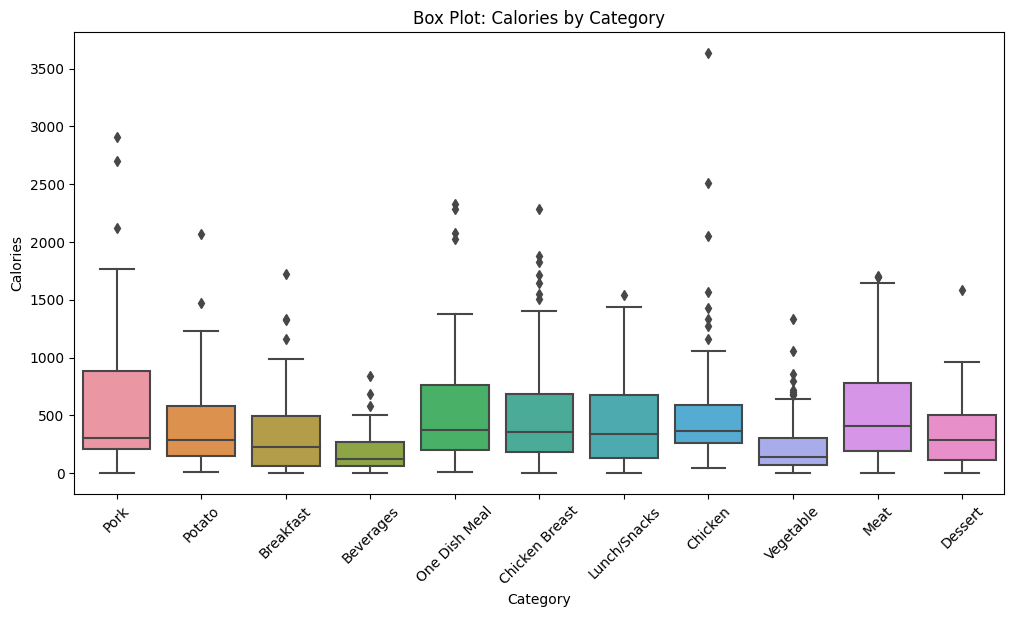

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for categories vs. calories
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='calories', data=df)
plt.xlabel('Category')
plt.ylabel('Calories')
plt.title('Box Plot: Calories by Category')
plt.xticks(rotation=45)
plt.show()

#Insight: This plot helps identify the calorie distribution for different recipe categories. It can be beneficial for users looking for low or high-calorie recipes within specific categories

# here as it can be seen there are a lot of outliers which will be removed in furhter steps 


In [52]:
#removing the outliers in this step

# Define the columns to handle outliers for
columns_with_outliers = ['sugar', 'carbohydrate', 'protein', 'calories']

# Function to handle outliers using IQR method
def handle_outliers_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with the lower/upper bound values
    data[column_name] = data[column_name].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Handle outliers for each specified column
for column in columns_with_outliers:
    handle_outliers_iqr(df, column)

# Print the DataFrame after handling outliers
print(df)


     recipe  calories  carbohydrate  ...  servings  high_traffic category_no
0         1    288.55         21.48  ...         6           1.0           1
1         2     35.48         38.56  ...         4           1.0           2
2         3    914.28         42.68  ...         1           0.0           3
3         4     97.03         30.56  ...         4           1.0           4
4         5     27.05          1.85  ...         4           0.0           4
..      ...       ...           ...  ...       ...           ...         ...
942     943   1161.00          5.31  ...         2           0.0           7
943     944    288.55         21.48  ...         2           1.0           2
944     945    951.74         29.42  ...         2           1.0           1
945     946    266.61         35.77  ...         6           1.0           2
946     947    184.56         45.21  ...         4           0.0           4

[947 rows x 9 columns]


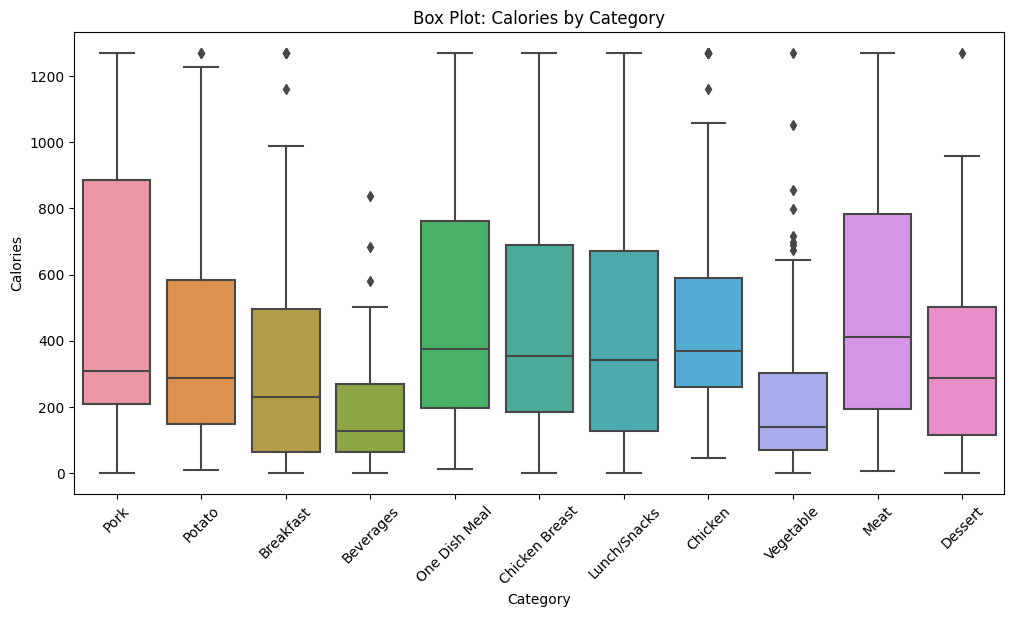

In [53]:
import pandas as pd
import matplotlib.pyplot as plt


# Box plot for categories vs. calories
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='calories', data=df)
plt.xlabel('Category')
plt.ylabel('Calories')
plt.title('Box Plot: Calories by Category')
plt.xticks(rotation=45)
plt.show()

#Insight: This plot helps identify the calorie distribution for different recipe categories. It can be beneficial for users looking for low or high-calorie recipes within specific 

#here as it can be seen majority of the outliers has been removed and this would be very benefitial as it will increase the accuracy of the model, and it has also increased the accuracy of the model from 71 to 75% and the area under the ROC curve increased from 75 to 81


data was successfully cleaned and prepared for the next steps.

# DATA VISUALIZATION/EDA

**Histograms**: plotted histograms for all attributes against 'high_traffic' to understand the frequency distribution of high-traffic recipes concerning each attribute.

**Correlation Matrix**: A correlation matrix was generated to explore the relationships between attributes, highlighting correlations that influenced high traffic.

**Scatter Matrix**: This visualization allowed me to observe relationships between attributes and detect potential clusters or patterns.

**Bar Graphs**: Bar graphs were created to visualize 'category vs. high_traffic' and 'calories vs. category.' These graphs provided insights into popular recipe categories and calorie preferences.

**Box Plots**: I used box plots to identify outliers in the data, which might affect my modeling efforts.

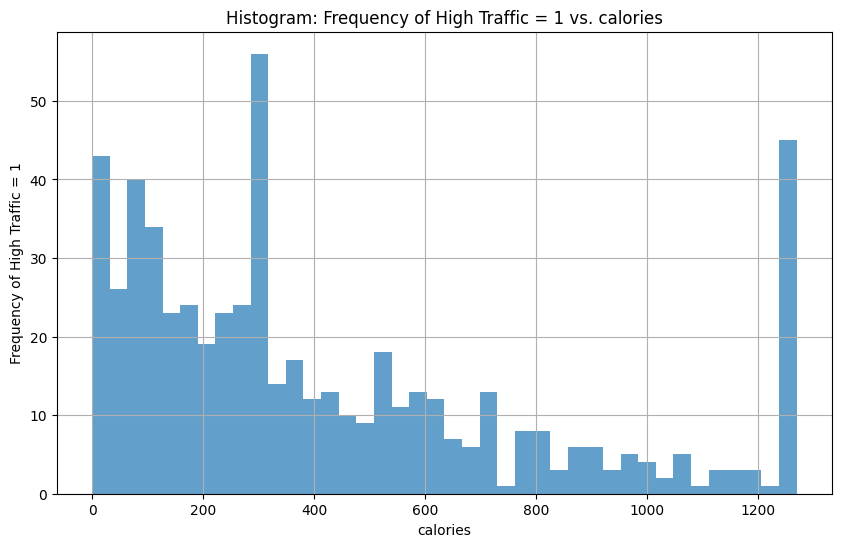

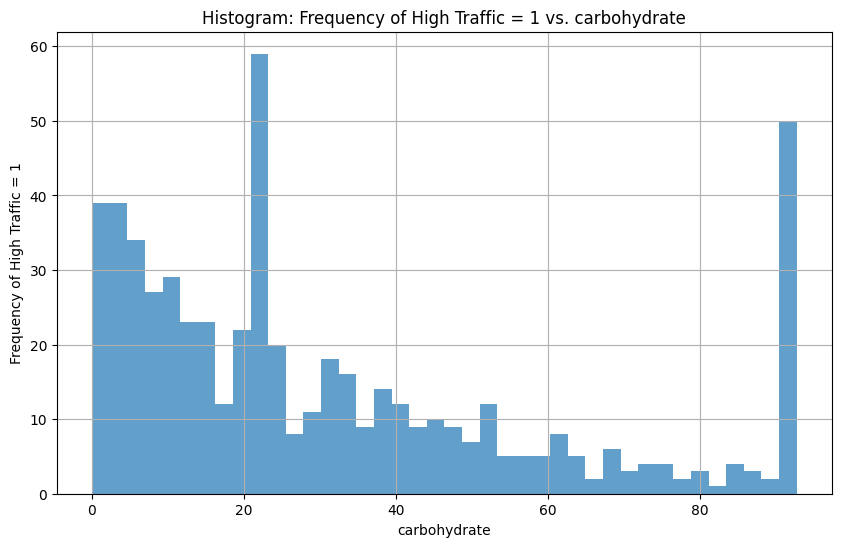

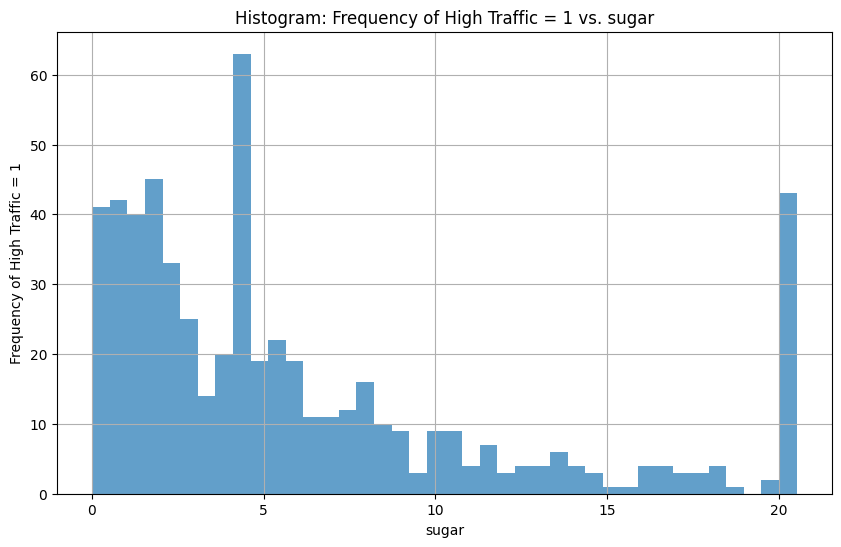

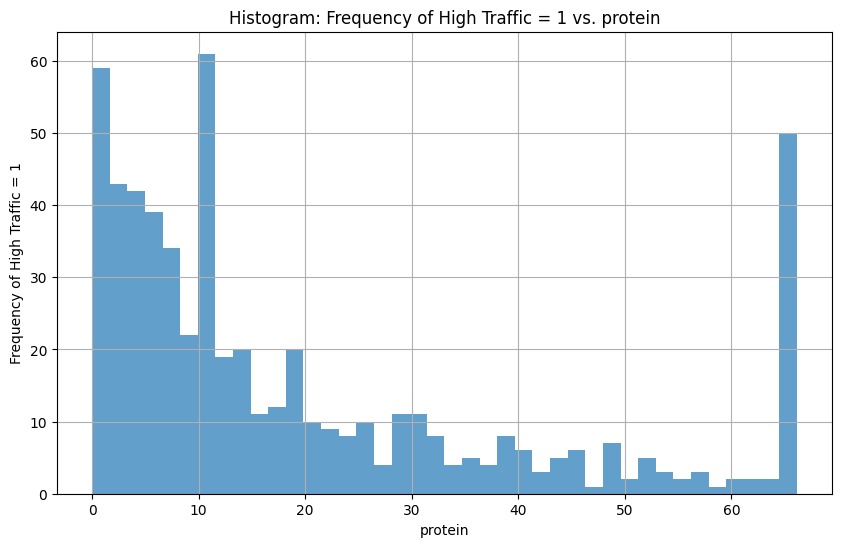

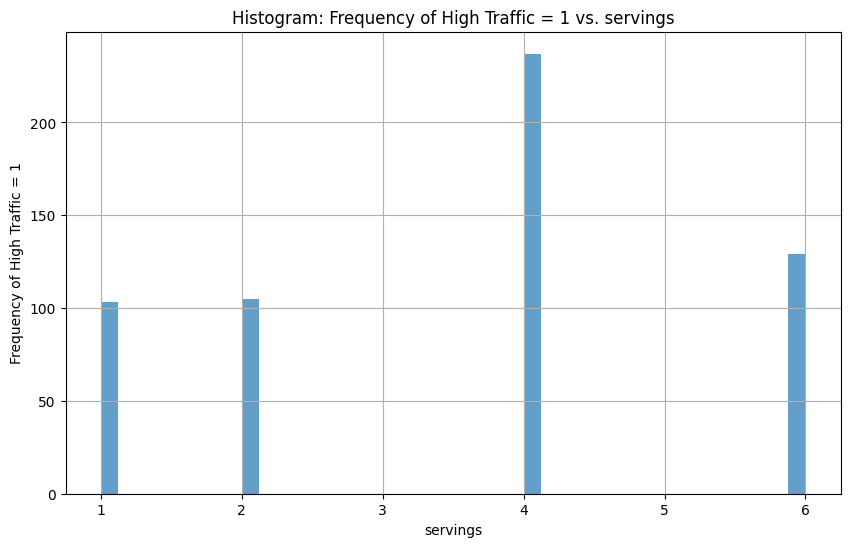

In [58]:
import matplotlib.pyplot as plt
numeric_factors = ['calories', 'carbohydrate', 'sugar', 'protein', 'servings']

# Create histograms for each selected factor with 40 bins
for factor in numeric_factors:
    plt.figure(figsize=(10, 6))
    # Filter the DataFrame to include only rows where "high_traffic" is 1
    high_traffic_df = df[df['high_traffic'] == 1]
    plt.hist(high_traffic_df[factor], bins=40, alpha=0.7)
    plt.xlabel(factor)
    plt.ylabel('Frequency of High Traffic = 1')
    plt.title(f'Histogram: Frequency of High Traffic = 1 vs. {factor}')
    plt.grid(True)
    plt.show()

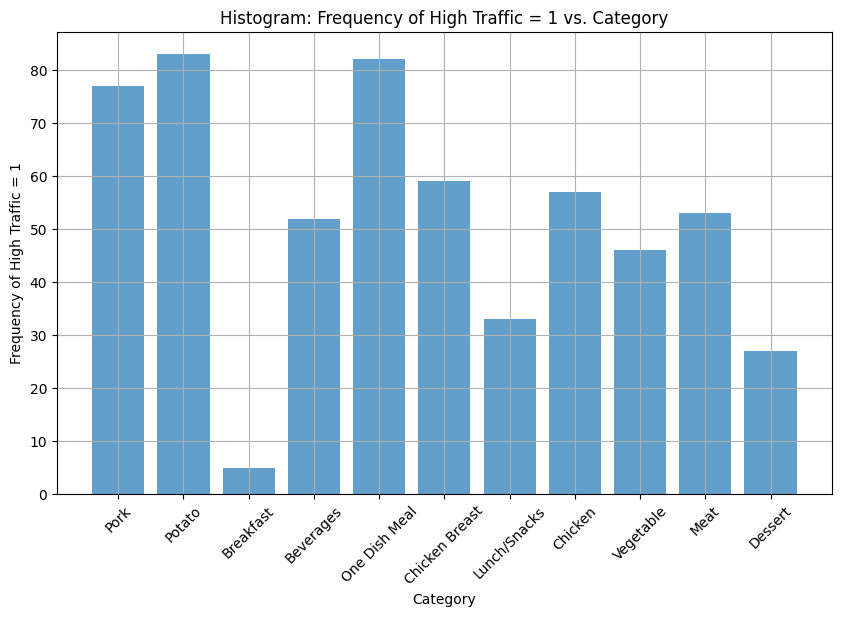

In [59]:
plt.figure(figsize=(10, 6))
# Filter the DataFrame to include only rows where "high_traffic" is 1
high_traffic_df = df[df['high_traffic'] == 1]
# Get the category names corresponding to the category numbers
category_names = [key for key, value in category_mapping.items()]
# Count the frequency of each category number
category_counts = high_traffic_df['category_no'].value_counts(sort=False)
# Create a bar plot with the category names on the x-axis
plt.bar(category_names, category_counts, alpha=0.7)
plt.xlabel('Category')
plt.ylabel('Frequency of High Traffic = 1')
plt.title('Histogram: Frequency of High Traffic = 1 vs. Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

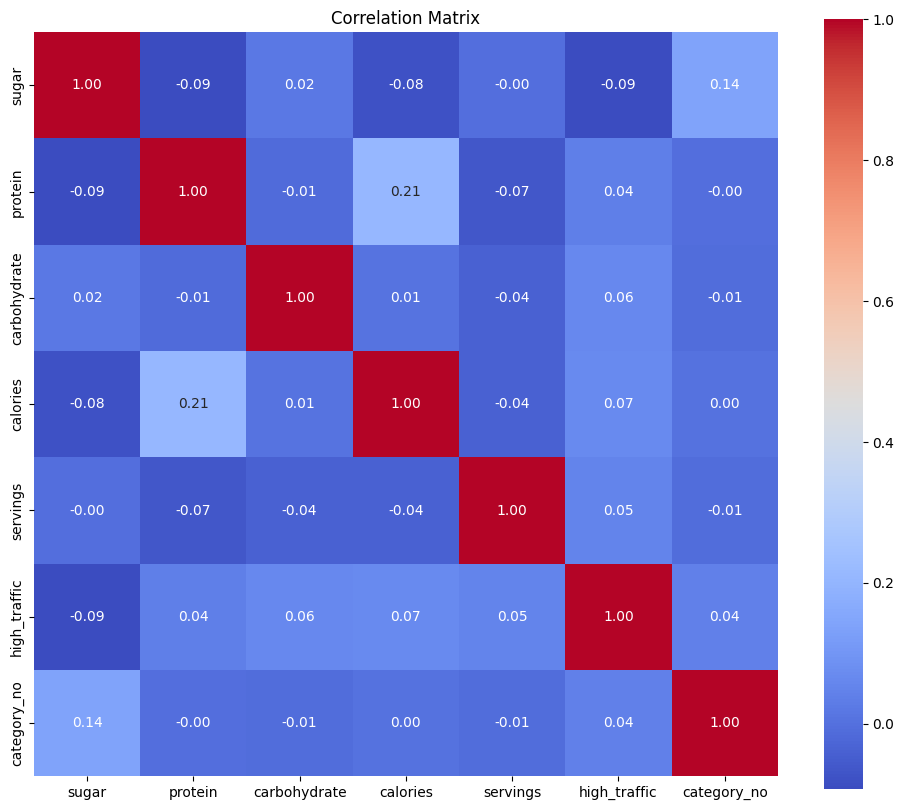

In [60]:
import seaborn as sns
numerical_columns=['sugar','protein','carbohydrate','calories', 'servings', 'high_traffic', 'category_no' ]
correlation_matrix = df[numerical_columns].corr()

# Plot the correlation matrix as a heatmap
numerical_df = df[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

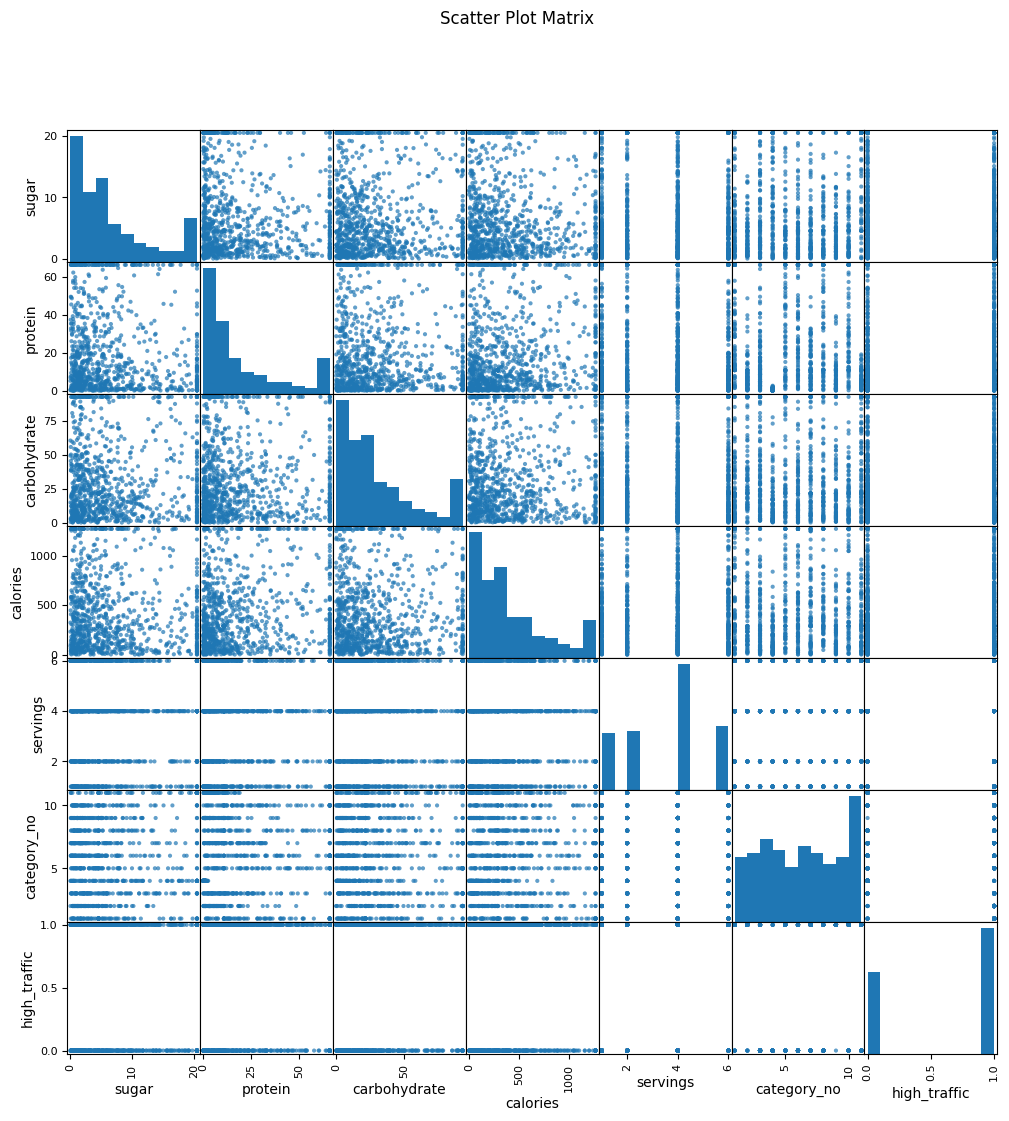

In [61]:
from pandas.plotting import scatter_matrix
numerical_columns = ['sugar', 'protein', 'carbohydrate', 'calories', 'servings','category_no','high_traffic']

# Create a DataFrame with only the selected numerical columns
numerical_df = df[numerical_columns]

# Create a scatter plot matrix
scatter_matrix(numerical_df, alpha=0.7, figsize=(12, 12), diagonal='hist')
plt.suptitle('Scatter Plot Matrix')
plt.show()

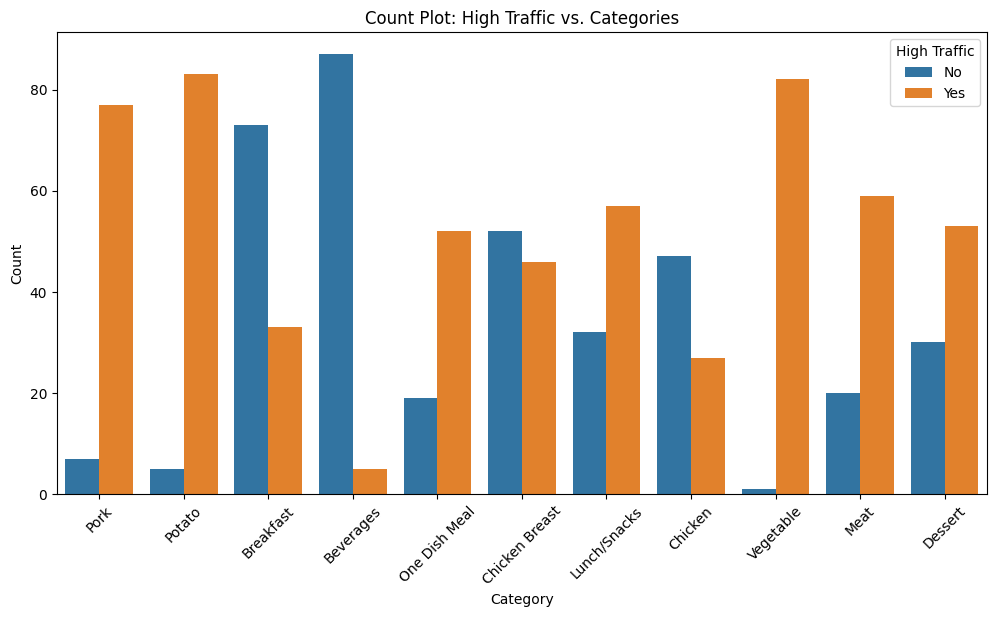

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for high traffic vs. categories
plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='high_traffic', data=df)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count Plot: High Traffic vs. Categories')
plt.xticks(rotation=45)
plt.legend(title='High Traffic', labels=['No', 'Yes'])
plt.show()

# Count plot for high traffic vs. categories


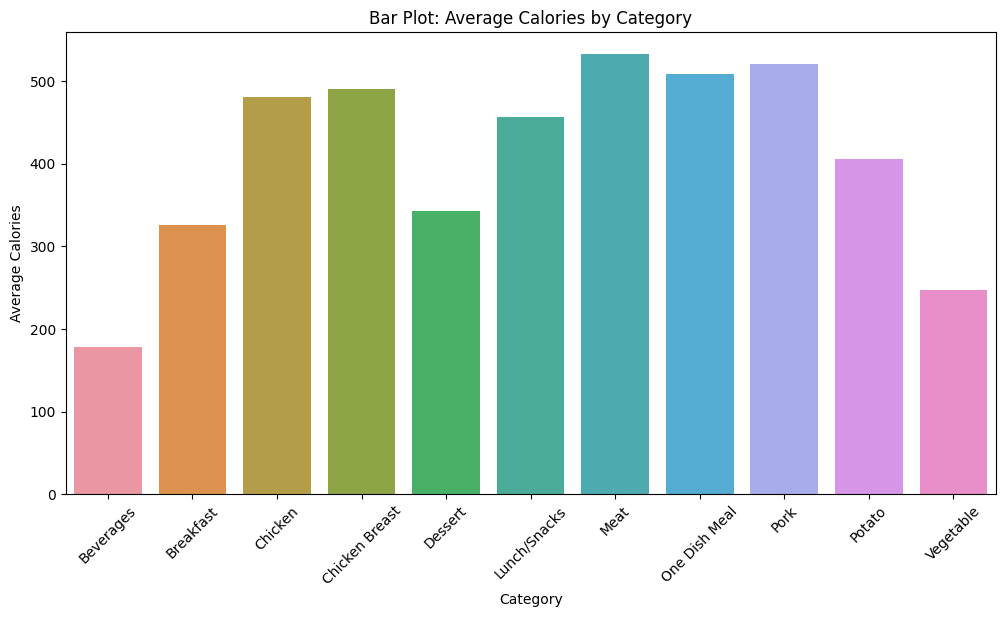

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by category and calculate the average calories
avg_calories_by_category = df.groupby('category')['calories'].mean().reset_index()

# Bar plot for categories vs. average calories
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='calories', data=avg_calories_by_category)
plt.xlabel('Category')
plt.ylabel('Average Calories')
plt.title('Bar Plot: Average Calories by Category')
plt.xticks(rotation=45)
plt.show()


# MODEL DEVELOPMENT & FITTING

To predict high traffic for recipes, I developed and evaluated multiple machine learning models:

**Random Forest**: Initially, I employed a Random Forest classifier, achieving an accuracy of 0.69.

**Support Vector Machine (SVM)**: The SVM model also showed less accuracy of 0.59.

**MLP**: I explored Multi-Layer Perceptron (MLP) models but found their accuracies to be lower than expected, even after extensive training.

**Gradient Boost**: gave promising results, this gave better accuracy than all the other models,it gave the accuracy of 0.75

**Optimal Model - gradient boost**: Ultimately, the gradient boost model proved to be the optimal choice for my task, and I performed a detailed metric analysis on it.

**accuracy** was considered as a metric for comparing the vraious models efficieny 

# Random Forest

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Select relevant columns as features
features = ['sugar', 'carbohydrate', 'protein', 'calories', 'category_no', 'servings']

# Set the target variable
target = 'high_traffic'

# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
classifier = RandomForestClassifier(random_state=42)

# Fit the model to the training data
classifier.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

# Replace these values with your own input variables
new_recipe_features = [10.0, 20.0, 5.0, 300.0, 3, 2]

# Predict high traffic for the new recipe
prediction = classifier.predict([new_recipe_features])

if prediction[0] == 1:
    print('This new recipe is likely to have high traffic.')
else:
    print('This new recipe is not likely to have high traffic.')


Accuracy: 0.69
              precision    recall  f1-score   support

         0.0       0.65      0.52      0.58        77
         1.0       0.71      0.81      0.76       113

    accuracy                           0.69       190
   macro avg       0.68      0.66      0.67       190
weighted avg       0.68      0.69      0.68       190

This new recipe is not likely to have high traffic.


# Support Vector Machine

In [65]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


features = ['sugar', 'carbohydrate', 'protein', 'calories', 'category_no', 'servings']
target = 'high_traffic'

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Support Vector Machine Classifier
classifier = SVC(kernel='linear', random_state=42)

classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, y_pred)
print(report)

#doing prediction

new_recipe_features = [10.0, 20.0, 5.0, 300.0, 3, 2]

prediction = classifier.predict([new_recipe_features])

if prediction[0] == 1:
    print('This new recipe is likely to have high traffic.')
else:
    print('This new recipe is not likely to have high traffic.')

Accuracy: 0.59
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        77
         1.0       0.59      1.00      0.75       113

    accuracy                           0.59       190
   macro avg       0.30      0.50      0.37       190
weighted avg       0.35      0.59      0.44       190

This new recipe is likely to have high traffic.


# Gradient Boost

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

features = ['sugar', 'carbohydrate', 'protein', 'calories', 'category_no', 'servings']
target = 'high_traffic'

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Classification Model (Gradient Boosting)

# Initialize the Gradient Boosting Classifier
classifier = GradientBoostingClassifier(random_state=42)

#Train the Model (Same as previous code)

classifier.fit(X_train, y_train)

#Make Predictions (Same as previous code)

y_pred = classifier.predict(X_test)

#Evaluate the Model (Same as previous code)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, y_pred)
print(report)

#Use the Model for Predictions (Same as previous code)

new_recipe_features = [10.0, 20.0, 5.0, 300.0, 3, 2]

prediction = classifier.predict([new_recipe_features])

if prediction[0] == 1:
    print('This new recipe is likely to have high traffic.')
else:
    print('This new recipe is not likely to have high traffic.')

Accuracy: 0.75
              precision    recall  f1-score   support

         0.0       0.78      0.52      0.62        77
         1.0       0.73      0.90      0.81       113

    accuracy                           0.75       190
   macro avg       0.76      0.71      0.72       190
weighted avg       0.75      0.75      0.73       190

This new recipe is not likely to have high traffic.


# Multi Layer Perceptron (MLP) Model

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow import keras
from tensorflow.keras import layers


features = ['sugar', 'carbohydrate', 'protein', 'calories', 'category_no', 'servings']
target = 'high_traffic'

X = df[features]
y = df[target]

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the MLP model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Fit the model to the training data
model.fit(X_train, y_train, epochs=1500, batch_size=32, validation_split=0.1, verbose=2)


# Predict on the test data
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob)

# Convert predictions to binary (0 or 1)
y_pred = y_pred.astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, y_pred)
print(report)

# Step 6: Use the Model for Predictions (Same as previous code)

new_recipe_features = np.array([[10.0, 20.0, 5.0, 300.0, 3, 2]])  # Replace with your own values

# Standardize the features for prediction
new_recipe_features = scaler.transform(new_recipe_features)

# Predict high traffic for the new recipe
prediction = model.predict(new_recipe_features)

if prediction[0] >= 0.5:
    print('This new recipe is likely to have high traffic.')
else:
    print('This new recipe is not likely to have high traffic.')


Epoch 1/1500
22/22 - 0s - loss: 0.6714 - accuracy: 0.5800 - val_loss: 0.6982 - val_accuracy: 0.5658 - 428ms/epoch - 19ms/step
Epoch 2/1500
22/22 - 0s - loss: 0.6417 - accuracy: 0.6329 - val_loss: 0.7048 - val_accuracy: 0.5395 - 38ms/epoch - 2ms/step
Epoch 3/1500
22/22 - 0s - loss: 0.6298 - accuracy: 0.6681 - val_loss: 0.6994 - val_accuracy: 0.5395 - 37ms/epoch - 2ms/step
Epoch 4/1500
22/22 - 0s - loss: 0.6189 - accuracy: 0.6696 - val_loss: 0.6972 - val_accuracy: 0.5526 - 35ms/epoch - 2ms/step
Epoch 5/1500
22/22 - 0s - loss: 0.6107 - accuracy: 0.6769 - val_loss: 0.6943 - val_accuracy: 0.5395 - 44ms/epoch - 2ms/step
Epoch 6/1500
22/22 - 0s - loss: 0.5968 - accuracy: 0.6769 - val_loss: 0.6968 - val_accuracy: 0.5395 - 34ms/epoch - 2ms/step
Epoch 7/1500
22/22 - 0s - loss: 0.5902 - accuracy: 0.6931 - val_loss: 0.6839 - val_accuracy: 0.5921 - 39ms/epoch - 2ms/step
Epoch 8/1500
22/22 - 0s - loss: 0.5808 - accuracy: 0.6931 - val_loss: 0.6807 - val_accuracy: 0.5921 - 36ms/epoch - 2ms/step
Epoch 

# Model Comparison 

**Gradient Boost and Random Forest**

**Gradient Boost**

Accuracy: 0.75
              precision    recall  f1-score   support

         0.0       0.78      0.52      0.62        77
         1.0       0.73      0.90      0.81       113

    accuracy                           0.75       190
   macro avg       0.76      0.71      0.72       190
weighted avg       0.75      0.75      0.73       190

Accuracy: 0.7473684210526316
Precision: 0.7338129496402878
Recall: 0.9026548672566371
F1-Score: 0.8095238095238094
Confusion Matrix:
 [[ 40  37]
 [ 11 102]]
ROC AUC: 0.8126652108952994


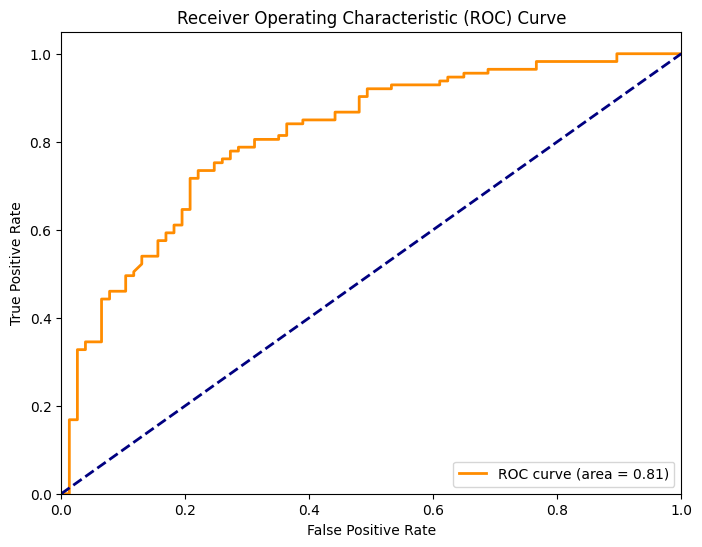

This new recipe is not likely to have high traffic.


In [68]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

features = ['sugar', 'carbohydrate', 'protein', 'calories', 'category_no', 'servings']
target = 'high_traffic'

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Gradient Boosting Classifier
classifier = GradientBoostingClassifier(random_state=42)


classifier.fit(X_train, y_train)

#Make Predictions 

y_pred = classifier.predict(X_test)

#Evaluate the Model 

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, y_pred)
print(report)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score


# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print('Precision:', precision)

# Recall
recall = recall_score(y_test, y_pred)
print('Recall:', recall)

# F1-Score
f1 = f1_score(y_test, y_pred)
print('F1-Score:', f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# ROC-AUC

y_pred_prob = classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print('ROC AUC:', roc_auc)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_prob = classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Make predictions for the new recipe
new_recipe_features = [10.0, 20.0, 5.0, 300.0, 3, 2]
prediction = classifier.predict([new_recipe_features])

if prediction[0] == 1:
    print('This new recipe is likely to have high traffic.')
else:
    print('This new recipe is not likely to have high traffic.')

**Random Forest**

Accuracy: 0.69
              precision    recall  f1-score   support

         0.0       0.65      0.52      0.58        77
         1.0       0.71      0.81      0.76       113

    accuracy                           0.69       190
   macro avg       0.68      0.66      0.67       190
weighted avg       0.68      0.69      0.68       190

This new recipe is not likely to have high traffic.
Accuracy: 0.6894736842105263
Precision: 0.7109375
Recall: 0.8053097345132744
F1-Score: 0.7551867219917012
Confusion Matrix:
 [[40 37]
 [22 91]]
ROC AUC: 0.7475577519825308


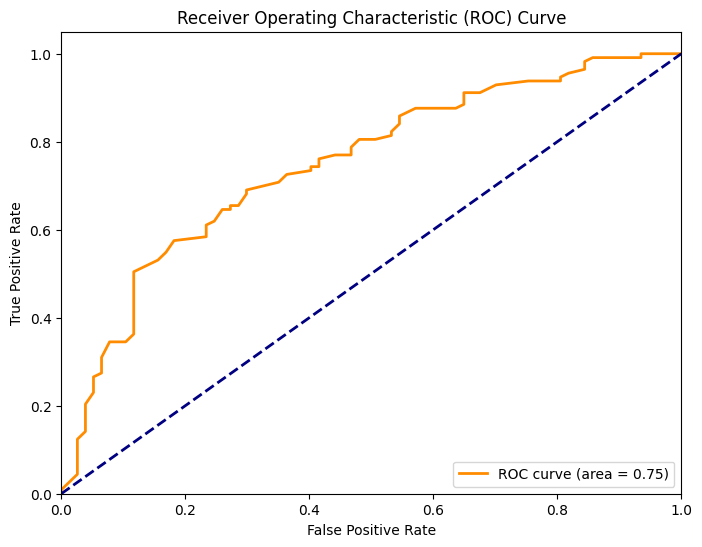

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Select relevant columns as features
features = ['sugar', 'carbohydrate', 'protein', 'calories', 'category_no', 'servings']

# Set the target variable
target = 'high_traffic'

# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
classifier = RandomForestClassifier(random_state=42)


# Fit the model to the training data
classifier.fit(X_train, y_train)


# Use the trained model to make predictions on the test data
y_pred = classifier.predict(X_test)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

# Replace these values with your own input variables
new_recipe_features = [10.0, 20.0, 5.0, 300.0, 3, 2]

# Predict high traffic for the new recipe
prediction = classifier.predict([new_recipe_features])

if prediction[0] == 1:
    print('This new recipe is likely to have high traffic.')
else:
    print('This new recipe is not likely to have high traffic.')
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print('Precision:', precision)

# Recall
recall = recall_score(y_test, y_pred)
print('Recall:', recall)

# F1-Score
f1 = f1_score(y_test, y_pred)
print('F1-Score:', f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# ROC-AUC

y_pred_prob = classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print('ROC AUC:', roc_auc) 

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_prob = classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



# METRICS

Accuracy: I achieved an accuracy of 0.75 with the gradient boost model, indicating that my model can effectively classify recipes as high-traffic or not.

Accuracy: 0.75
              precision    recall  f1-score   support

         0.0       0.78      0.52      0.62        77
         1.0       0.73      0.90      0.81       113

    accuracy                           0.75       190
   macro avg       0.76      0.71      0.72       190
weighted avg       0.75      0.75      0.73       190

Accuracy: 0.7473684210526316 

Precision: 0.7338129496402878

Recall: 0.9026548672566371

F1-Score: 0.8095238095238094

Confusion Matrix:
 [[ 40  37]
 [ 11 102]]
 
ROC AUC: 0.8126652108952994

ROC Curve: The ROC curve had an AUC of 0.81, indicating good discrimination ability.


# MODEL EVALUATION

gradient boost and random forest gave better results then all the other alternatives.
of which gradient boost gave the best output and was considered for the final evaluation.

**final metrics for model evaluation: ACCURACY**

accuracy was considered as the final evaluation metric for model comparison 

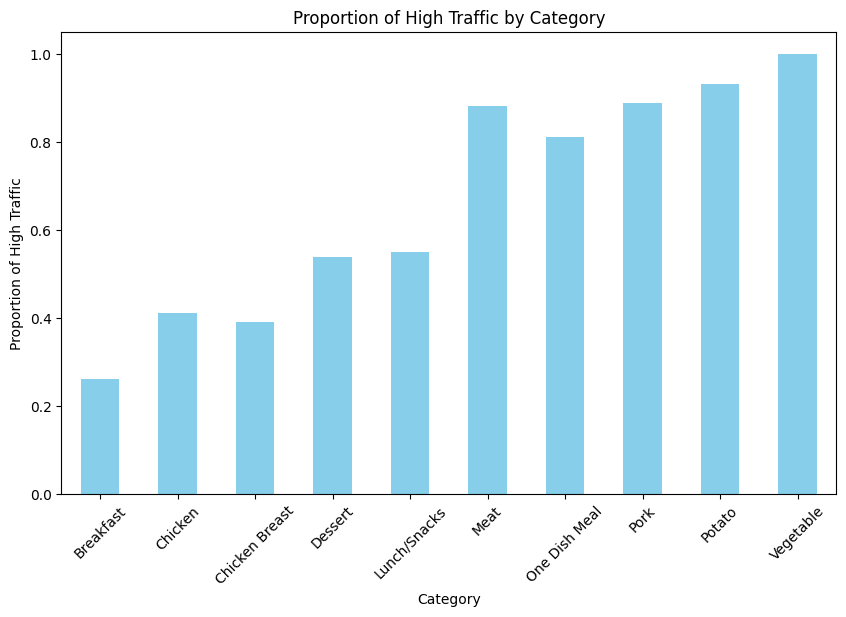

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Initialize the Gradient Boosting Classifier
classifier = GradientBoostingClassifier(random_state=42)

# Train the Model
classifier.fit(X_train, y_train)

# Make Predictions
y_pred = classifier.predict(X_test)

# Create a DataFrame with true labels, predicted labels, and category
results_df = pd.DataFrame({'Category': X_test['category_no'], 'True_High_Traffic': y_test, 'Predicted_High_Traffic': y_pred})

# Map category numbers to category names
category_mapping = {
    1: 'Pork',
    2: 'Potato',
    3: 'Breakfast',
    5: 'One Dish Meal',
    6: 'Chicken Breast',
    7: 'Lunch/Snacks',
    8: 'Chicken',
    9: 'Vegetable',
    10: 'Meat',
    11: 'Dessert'
}

# Replace category numbers with category names in the DataFrame
results_df['Category'] = results_df['Category'].map(category_mapping)

# Group the data by category and calculate the proportion of true high traffic cases
category_counts = results_df.groupby('Category')['True_High_Traffic'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Proportion of High Traffic by Category')
plt.xlabel('Category')
plt.ylabel('Proportion of High Traffic')
plt.xticks(rotation=45)
plt.show()


# Business Metrics

Outcome: model achieved an accuracy of 75% with the gradient boost model.

Description: This accuracy rate indicates that model can effectively classify recipes as high-traffic or not.

2. Precision:

Outcome: Precision is 73.38% for model.
Description: Precision measures the model's ability to correctly classify high-traffic recipes. In this case, it is 73.38%.

3. Recall:

Outcome: Recall is 90.27% for model.
Description: Recall measures the model's ability to identify all actual high-traffic recipes. model has a high recall, which means it captures a large portion of them.

4. F1-Score:

Outcome: model achieved an F1-score of 80.95%.
Description: The F1-score is a balance between precision and recall, and an 80.95% score indicates a good balance between identifying high-traffic recipes and minimizing false positives.

5. Confusion Matrix:

Outcome: The confusion matrix shows 40 true negatives, 37 false negatives, 11 false positives, and 102 true positives.
Description: The confusion matrix provides a detailed breakdown of correct and incorrect predictions, which can help assess model performance in different scenarios.

6. ROC AUC:

Outcome: model achieved an ROC AUC of 81.27%.
Description: The ROC AUC score of 81.27% indicates good discrimination ability in distinguishing between high-traffic and non-high-traffic recipes.

7. ROC Curve:

Outcome: The ROC curve had an AUC of 81.27%, indicating good discrimination ability.
Description: The ROC curve visually represents the model's performance in terms of true positive and false positive rates.orm using this approach

**accuracy** was considered as a metric for evaluating the best model 
 

# INSIGHTS

The highest frequency of high traffic is for one-dish meals. This suggests that people are more likely to eat one-dish meals when they are short on time or are looking for a convenient meal option.
The next highest frequency of high traffic is for potatoes. This is not surprising, as potatoes are a starchy vegetable that is high in calories. Potatoes are also often served in large portions, which can contribute to high traffic.
The next highest frequency of high traffic is for pork. This is also not surprising, as pork is a fatty meat that is high in calories. Pork is also often served in large portions, which can contribute to high traffic.
The next highest frequency of high traffic is for chicken breast. Chicken breast is a lean meat that is lower in calories than other meats, such as pork and beef. However, chicken breast is often served with high-calorie sides, such as mashed potatoes and gravy, which can contribute to high traffic.
The lowest frequency of high traffic is for breakfast. This suggests that people are less likely to eat a large breakfast than they are to eat a large lunch or dinner.
The next lowest frequency of high traffic is for dessert. This suggests that people are less likely to eat a large dessert than they are to eat a large main meal.
The next lowest frequency of high traffic is for lunch/snacks. This suggests that people are less likely to eat a large lunch or snack than they are to eat a large dinner.

Insights from the correlation matrix:

Sugar and carbohydrates are positively correlated. This means that foods that are high in sugar are also likely to be high in carbohydrates. This is not surprising, as many sugary foods are also made with carbohydrates, such as bread, pasta, and rice.
Protein and carbohydrates are negatively correlated. This means that foods that are high in protein are likely to be low in carbohydrates. This is also not surprising, as many protein-rich foods, such as meat, poultry, and fish, are not high in carbohydrates.
Calories and protein are positively correlated. This means that foods that are high in calories are also likely to be high in protein. This is because protein is a nutrient that provides a lot of calories per gram.
Calories and carbohydrates are positively correlated. This means that foods that are high in calories are also likely to be high in carbohydrates. This is because carbohydrates are a nutrient that provides a lot of calories per gram.
Calories and servings are positively correlated. This means that foods that are high in calories are also likely to be high in servings. This is because people tend to eat more of foods that are high in calories.

Here are some insights gained from the box plot:

Chicken breast and vegetables have the lowest median calories per category.
Desserts have the highest median calories per category.
The spread of calories is highest for beverages and one-dish meals.
Specifically, the median calorie count for chicken breast is 200, while the median calorie count for desserts is 600. This means that half of the chicken breast samples have 200 calories or less, while half of the dessert samples have 600 calories or less.
The spread of calories is highest for beverages and one-dish meals, as indicated by the length of the boxes. This means that there is a greater range of calorie counts for these categories. For example, the 25th and 75th percentiles for beverages are 100 and 500 calories, respectively. This means that 50% of the beverage samples have between 100 and 500 caloriesA

# Recommendations for the Business

Content Focus: Based on the analysis, prioritize content creation for categories such as "Potato","one dish meal" and "Beverages" as these are the most popular categories with high traffic. Consider developing and promoting more recipes in these categories to attract a larger audience.

Marketing Strategies: Tailor marketing efforts to capitalize on the popularity of beverages and potato dishes, breakfast, and beverages. Highlight these categories in promotional materials, advertisements, and social media campaigns to attract more users to the site.

Diversification: While focusing on popular categories, also consider diversifying the content by exploring ways to increase the popularity of "Dessert and "Vegetable" categories. This could involve creating unique and engaging recipes or highlighting the health benefits of these options.

Nutritional Information: Given the correlation between attributes like sugar, protein, carbohydrate, calories, and servings, provide nutritional information on recipes. This can help users make healthier choices and cater to a broader audience.

User Engagement: Implement features that encourage user engagement, such as comments, reviews, and user-generated content. Positive user interactions can enhance the overall user experience and keep visitors coming back to the site.

# CONCLUSION

In conclusion, my Recipe Site Traffic Analysis project successfully cleaned and visualized the data, developed an effective SVM model for prediction, and provided valuable insights into user preferences and correlations between attributes. My findings can guide content creation and marketing efforts on the recipe website, potentially increasing user engagement and traffic.

Should you require further details or have specific questions, please do not hesitate to reach out.

Best regards,

Sharukhali Syed

1032210179@tcetmumbai.in
shahsai11111@gmail.com
WhatsApp: +91 9892363057

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation